In [1]:
import pandas as pd
import numpy as np

In [3]:
df =pd.read_csv("D:/IPLPro/Factors_ affecting_ university_student_grades_dataset.csv")

In [4]:
df.head()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,...,Neutral,NaN,No,Visual,Yes,NaN,Low,2.0,NaN,B
1,21.0,M,NaN,60000.0,A,NaN,Medium,12.0,Law,Public,...,Negative,No,No,Auditory,Yes,Yes,Medium,5.0,High,NaN
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,...,Neutral,No,Yes,NaN,No,No,Low,2.0,High,A
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,...,Neutral,No,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C
4,19.0,NaN,NaN,40000.0,NaN,89.0,High,15.0,Medicine,NaN,...,Positive,No,No,Auditory,Yes,NaN,Medium,3.0,High,B


In [5]:
df.isnull().sum()

Age                             965
Gender                          979
Parental_Education              962
Family_Income                   967
Previous_Grades                 944
Attendance                     1004
Class_Participation             966
Study_Hours                     991
Major                           928
School_Type                     949
Financial_Status                935
Parental_Involvement            946
Educational_Resources           935
Motivation                      970
Self_Esteem                     912
Stress_Levels                   919
School_Environment              958
Professor_Quality               950
Class_Size                      950
Extracurricular_Activities      905
Sleep_Patterns                 1016
Nutrition                       977
Physical_Activity               974
Screen_Time                     944
Educational_Tech_Use            993
Peer_Group                      919
Bullying                        975
Study_Space                 

In [12]:

# Fill null values
for column in df.columns:
    if df[column].dtype == 'object':  # For categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # For numeric columns
        df[column].fillna(df[column].median(), inplace=True)

# Verify if null values are filled



C:\Users\gaura\AppData\Local\Temp\ipykernel_19996\1642753303.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\gaura\AppData\Local\Temp\ipykernel_19996\1642753303.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [13]:
df.isnull().sum()

Age                            0
Gender                         0
Parental_Education             0
Family_Income                  0
Previous_Grades                0
Attendance                     0
Class_Participation            0
Study_Hours                    0
Major                          0
School_Type                    0
Financial_Status               0
Parental_Involvement           0
Educational_Resources          0
Motivation                     0
Self_Esteem                    0
Stress_Levels                  0
School_Environment             0
Professor_Quality              0
Class_Size                     0
Extracurricular_Activities     0
Sleep_Patterns                 0
Nutrition                      0
Physical_Activity              0
Screen_Time                    0
Educational_Tech_Use           0
Peer_Group                     0
Bullying                       0
Study_Space                    0
Learning_Style                 0
Tutoring                       0
Mentoring 

In [20]:
from scipy.stats import zscore
for column in df.columns:
# Calculate Z-scores
    df['z_score'] = zscore(column)

# Remove outliers (e.g., Z-score > 3)
    df = df[df['z_score'] < 3]


AxisError: axis 0 is out of bounds for array of dimension 0

In [19]:
for column in df.columns:
    print(column)

Age
Gender
Parental_Education
Family_Income
Previous_Grades
Attendance
Class_Participation
Study_Hours
Major
School_Type
Financial_Status
Parental_Involvement
Educational_Resources
Motivation
Self_Esteem
Stress_Levels
School_Environment
Professor_Quality
Class_Size
Extracurricular_Activities
Sleep_Patterns
Nutrition
Physical_Activity
Screen_Time
Educational_Tech_Use
Peer_Group
Bullying
Study_Space
Learning_Style
Tutoring
Mentoring
Lack_of_Interest
Time_Wasted_on_Social_Media
Sports_Participation
Grades


In [21]:
from scipy.stats import zscore

# Loop through each numeric column to calculate and remove outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:  # Only process numeric columns
    # Calculate Z-scores for the column and store them in a new column temporarily
    df['z_score'] = zscore(df[column])

    # Remove rows with Z-score > 3 (outliers)
    df = df[df['z_score'].abs() < 3]

    # Drop the temporary 'z_score' column after processing
    df.drop(columns=['z_score'], inplace=True)

# Check the data to confirm removal of outliers
print(df.head())


    Age Gender Parental_Education Family_Income Previous_Grades  Attendance  \
0  22.0      F            College       50000.0               A        81.0   
1  21.0      M       Some College       60000.0               A        85.0   
2  19.0      M            College       75000.0               C        93.0   
3  21.0      M            College       60000.0               A        86.0   
4  19.0      F       Some College       40000.0               C        89.0   

  Class_Participation  Study_Hours     Major School_Type  ... Peer_Group  \
0              Medium          8.0       Law     Private  ...    Neutral   
1              Medium         12.0       Law      Public  ...   Negative   
2              Medium         12.0       Law     Private  ...    Neutral   
3                 Low         15.0  Business      Public  ...    Neutral   
4                High         15.0  Medicine      Public  ...   Positive   

  Bullying Study_Space Learning_Style Tutoring Mentoring Lack_of_Int

In [22]:
df.describe()

,Age,Attendance,Study_Hours,Class_Size,Sleep_Patterns,Screen_Time,Time_Wasted_on_Social_Media
count,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000
mean,19.997019,84.917627,12.421701,60.310612,6.585453,6.028517,3.444257
std,1.337728,8.525256,4.382990,22.209443,1.637364,2.473045,1.629828
min,18.000000,70.000000,5.000000,20.000000,4.000000,2.000000,1.000000
25%,19.000000,78.000000,9.000000,42.000000,5.000000,4.000000,2.000000
50%,20.000000,85.000000,12.000000,61.000000,7.000000,6.000000,3.000000
75%,21.000000,92.000000,16.000000,78.000000,8.000000,8.000000,5.000000
max,22.000000,100.000000,20.000000,100.000000,9.000000,10.000000,6.000000


In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column with object data type
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])


In [24]:
df.describe()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
count,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,...,10064.000000,10064.000000,10064.000000,10064.000000,10064.000000,10064.00000,10064.000000,10064.000000,10064.000000,10064.000000
mean,19.997019,0.449921,1.650835,1.804352,1.099861,84.917627,1.098172,12.421701,2.351948,0.549384,...,0.906697,0.558724,0.551570,1.110195,0.548390,0.54998,0.904610,3.444257,1.003676,1.003378
std,1.337728,0.497510,1.153051,1.467857,0.832644,8.525256,0.830515,4.382990,1.680816,0.497580,...,0.836974,0.496564,0.497358,0.834322,0.497678,0.49752,0.832154,1.629828,0.774023,0.771259
min,18.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,19.000000,0.000000,1.000000,0.000000,0.000000,78.000000,0.000000,9.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,0.000000
50%,20.000000,0.000000,2.000000,2.000000,1.000000,85.000000,1.000000,12.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.000000,1.000000,1.000000
75%,21.000000,1.000000,3.000000,3.000000,2.000000,92.000000,2.000000,16.000000,4.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.00000,2.000000,5.000000,2.000000,2.000000
max,22.000000,1.000000,3.000000,5.000000,2.000000,100.000000,2.000000,20.000000,5.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.00000,2.000000,6.000000,2.000000,2.000000


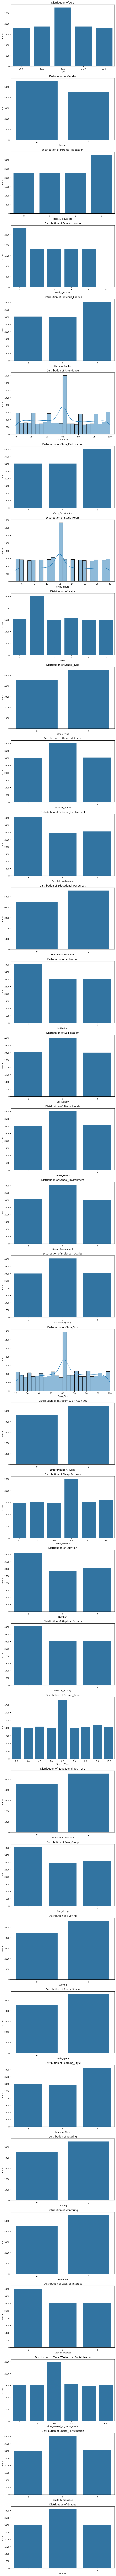

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size and layout
num_columns = len(df.columns)
fig, axes = plt.subplots(nrows=num_columns, figsize=(8, 5 * num_columns))

# Loop through each column and create a bar plot
for i, column in enumerate(df.columns):
    # Check if data type is categorical or numerical
    if df[column].dtype == 'object' or df[column].nunique() < 10:
        # For categorical columns or numerical columns with few unique values
        sns.countplot(data=df, x=column, ax=axes[i])
    else:
        # For continuous numerical columns, show the distribution with histograms
        sns.histplot(data=df, x=column, kde=True, ax=axes[i])

    # Set the title for each subplot
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [26]:
# Calculate correlation matrix
correlation_matrix = df.corr()


In [27]:
correlation_matrix

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
Age,1.000000e+00,-0.005301,0.006347,0.013215,-3.723264e-07,-0.005938,-0.000631,-0.015751,0.015935,-0.010528,...,0.003391,0.005799,0.003069,0.016143,-0.009038,-0.015155,-0.006594,0.001018,-0.001909,0.008678
Gender,-5.301026e-03,1.000000,-0.009351,-0.010356,9.314876e-03,-0.000118,-0.002530,0.001574,0.006106,0.005776,...,-0.000364,0.004464,-0.001008,0.000488,-0.002051,0.007504,0.007183,-0.014289,0.017897,0.021678
Parental_Education,6.347498e-03,-0.009351,1.000000,0.014649,-2.071035e-02,0.010115,-0.002597,-0.008183,-0.015498,0.014296,...,-0.000192,-0.002021,0.000731,-0.009067,0.001912,0.004786,0.003294,0.008044,0.003109,-0.011636
Family_Income,1.321535e-02,-0.010356,0.014649,1.000000,-2.388313e-03,-0.003369,0.020974,0.029384,-0.006808,-0.015546,...,-0.013485,0.018559,0.000278,-0.000327,-0.007376,0.003934,-0.017070,0.000072,-0.005752,0.003832
Previous_Grades,-3.723264e-07,0.009315,-0.020710,-0.002388,1.000000e+00,0.011616,-0.001101,-0.000485,0.005843,-0.002670,...,-0.005166,-0.002047,-0.025035,0.014055,0.006203,0.010860,-0.013214,0.002821,0.004210,-0.014917
Attendance,-5.938061e-03,-0.000118,0.010115,-0.003369,1.161639e-02,1.000000,-0.001384,-0.003009,-0.025848,-0.010086,...,0.002544,0.022939,0.003920,-0.010292,-0.014015,0.001568,0.002632,0.021093,-0.004306,-0.004930
Class_Participation,-6.310225e-04,-0.002530,-0.002597,0.020974,-1.101132e-03,-0.001384,1.000000,-0.009682,0.007779,0.004860,...,-0.008551,0.002164,-0.009611,-0.009017,-0.009090,-0.008509,-0.011180,-0.009025,0.009487,0.001964
Study_Hours,-1.575117e-02,0.001574,-0.008183,0.029384,-4.849503e-04,-0.003009,-0.009682,1.000000,-0.009613,-0.014334,...,0.005580,-0.001334,0.000644,-0.014421,-0.018148,-0.000370,-0.000331,0.019470,-0.006960,-0.001303
Major,1.593530e-02,0.006106,-0.015498,-0.006808,5.843250e-03,-0.025848,0.007779,-0.009613,1.000000,-0.003317,...,-0.001167,0.005358,-0.002931,-0.005691,0.017416,0.000115,-0.006972,-0.004881,0.003970,-0.008890
School_Type,-1.052797e-02,0.005776,0.014296,-0.015546,-2.669802e-03,-0.010086,0.004860,-0.014334,-0.003317,1.000000,...,0.007844,-0.003695,-0.016717,-0.018735,0.016433,0.001670,-0.008782,0.006458,-0.000342,0.012771


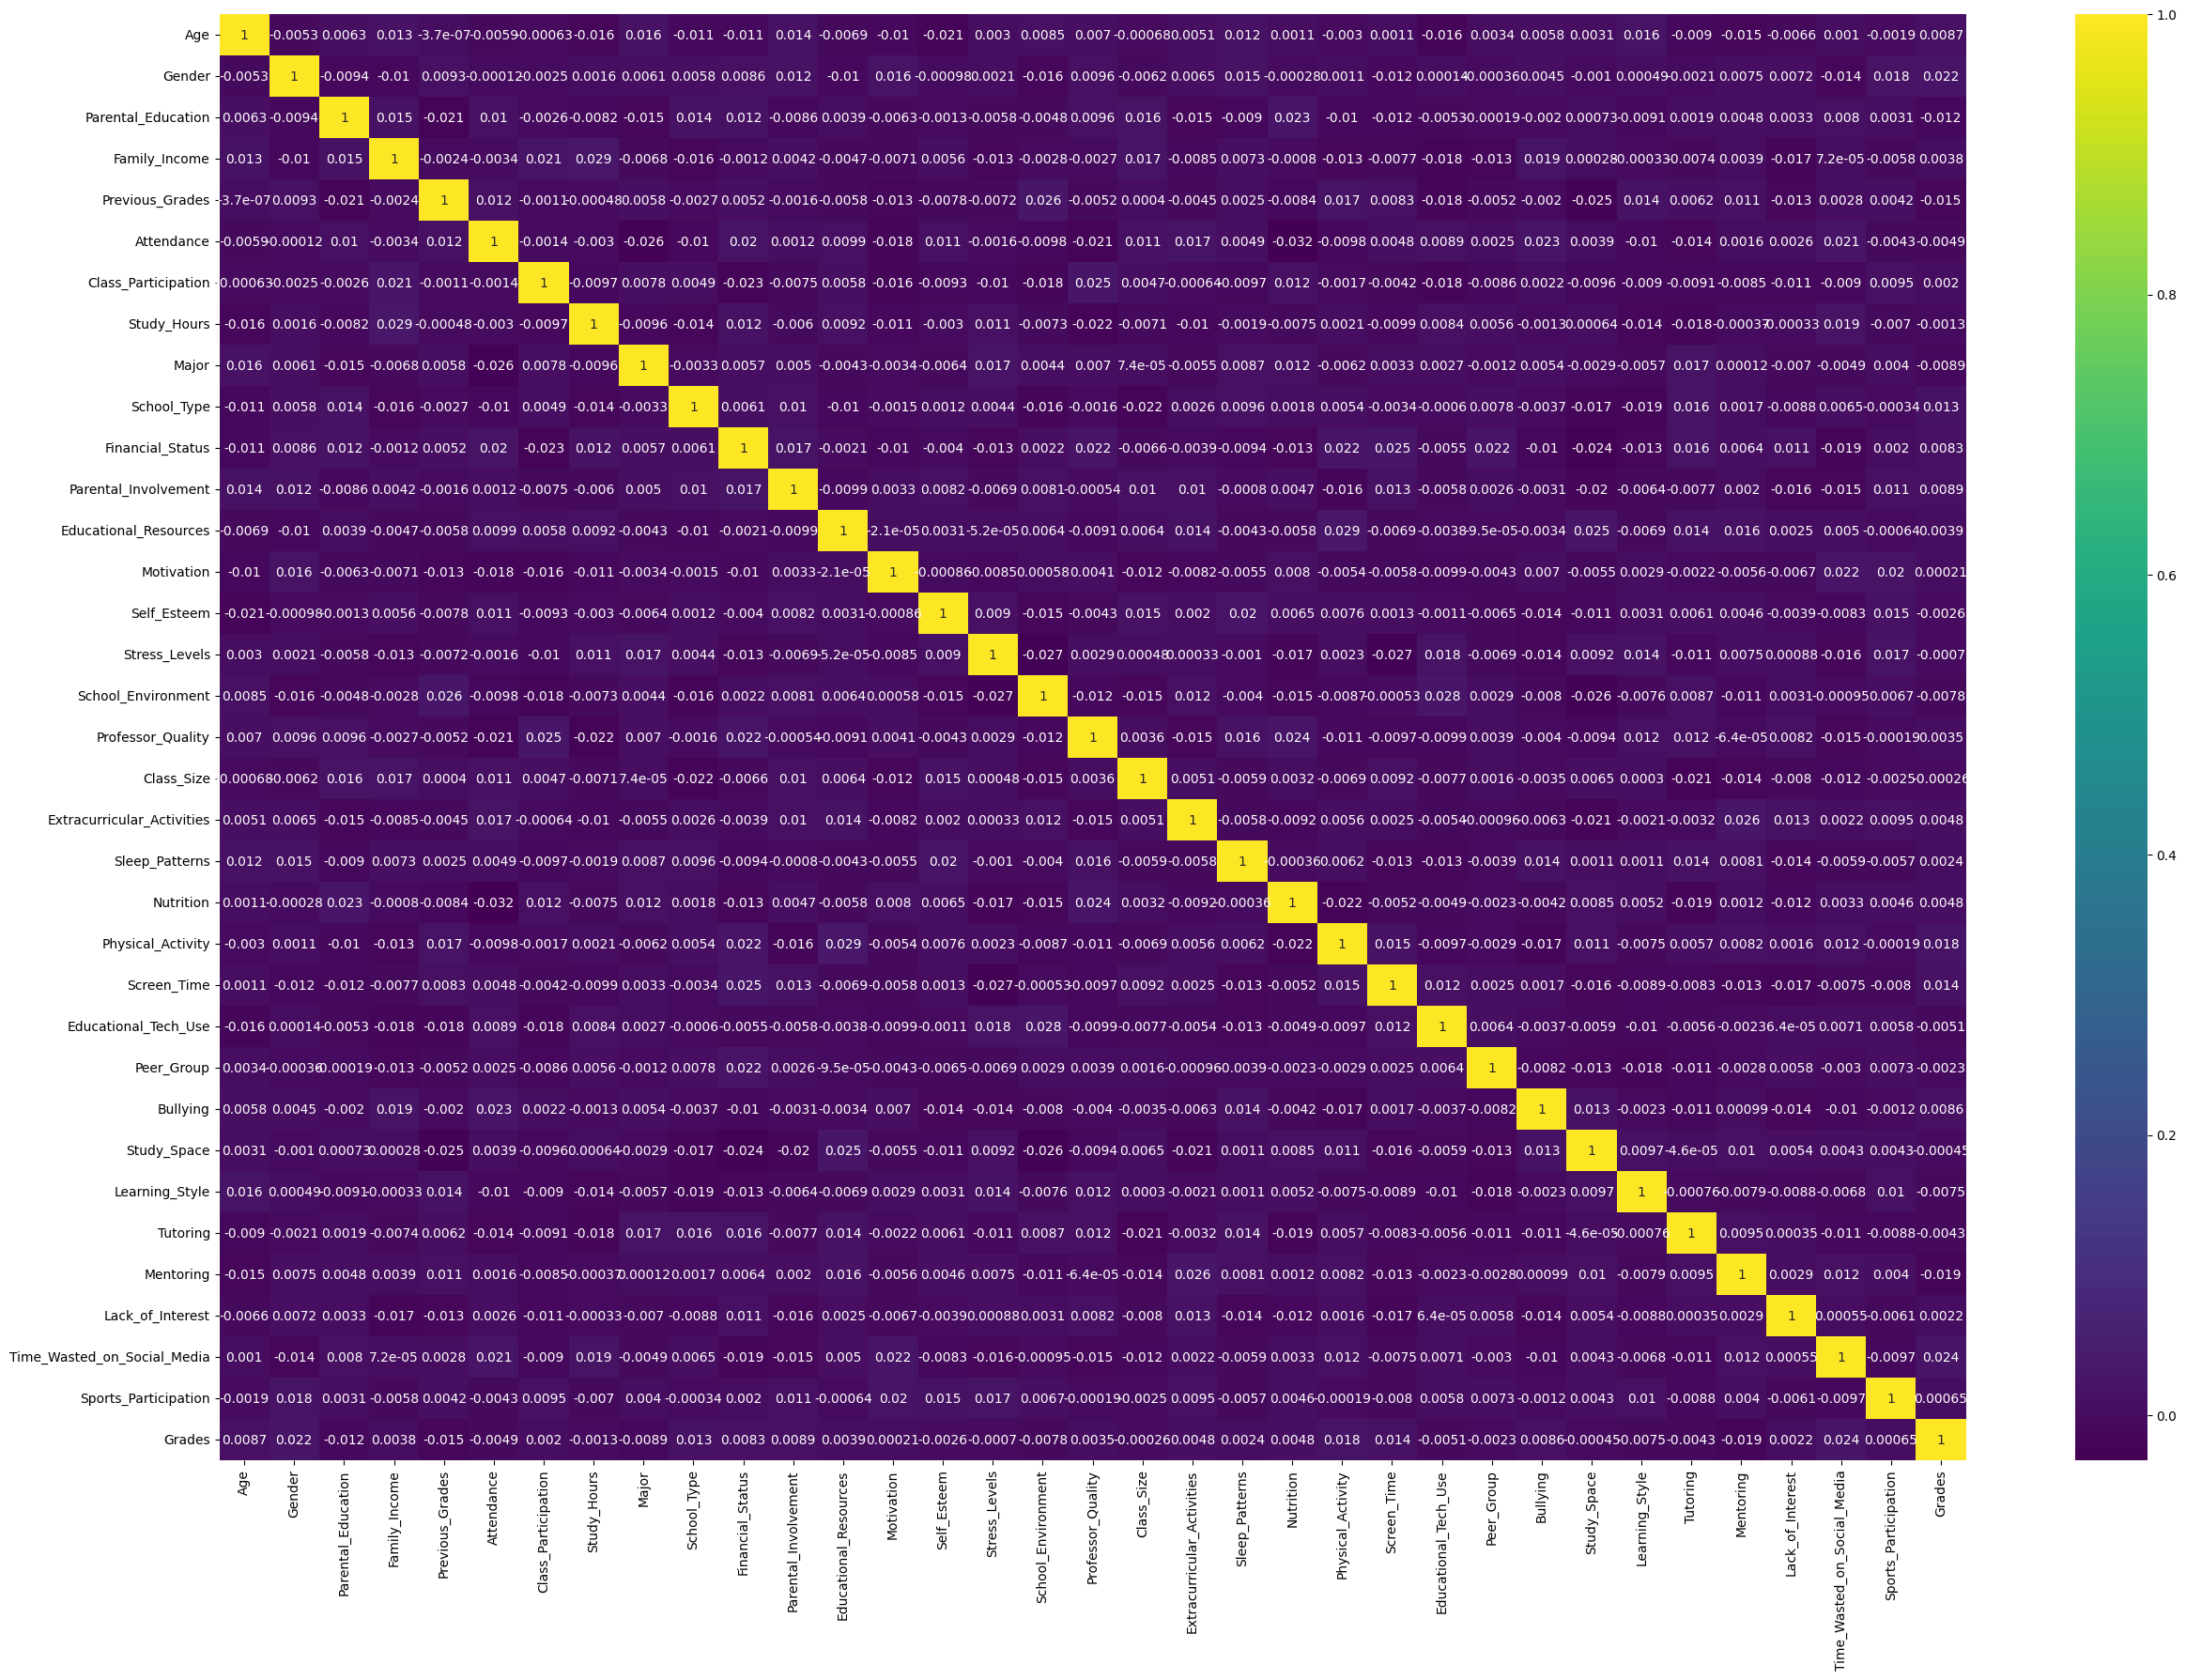

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(30, 20))  # Adjust the width and height as needed

# Create the heatmap with the specified size
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Display the plot
plt.show()


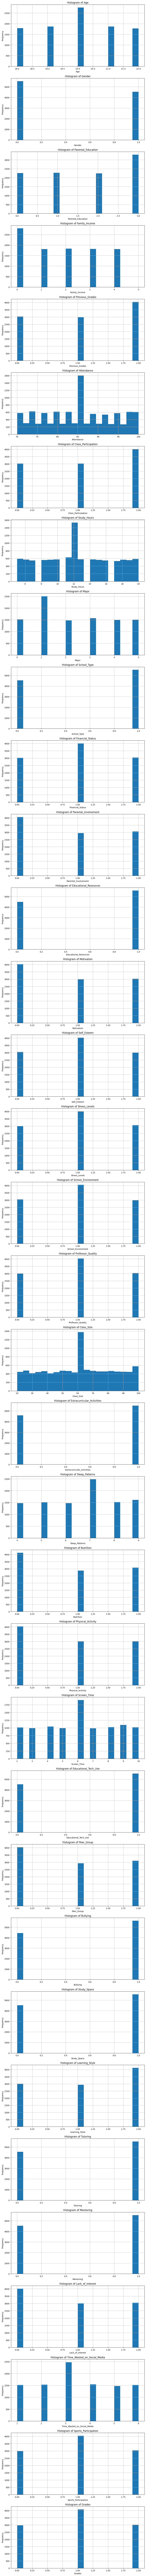

In [38]:
import matplotlib.pyplot as plt

# Set the number of subplots based on the number of numeric columns
num_numeric_columns = df.select_dtypes(include=['number']).shape[1]
fig, axes = plt.subplots(nrows=num_numeric_columns, ncols=1, figsize=(10, 5 * num_numeric_columns))

# Loop through each numeric column and create a histogram
for i, column in enumerate(df.select_dtypes(include=['number']).columns):
    df[column].hist(ax=axes[i], bins=20)  # You can adjust the number of bins
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()



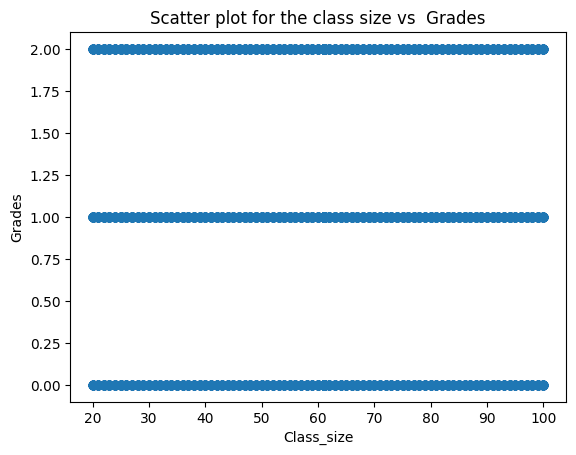

In [54]:
import matplotlib.pyplot as plt
plt.scatter(df['Class_Size'],df['Grades'])
plt.xlabel('Class_size')
plt.ylabel('Grades')
plt.title("Scatter plot for the class size vs  Grades")
plt.show()

In [45]:
import pandas as pd

# Loop through all numeric columns in the DataFrame
for column in df.select_dtypes(include=['number']).columns:
    # Create bins for the column
    df[f'binned_{column}'] = pd.cut(df[column], bins=3, labels=['Low', 'Medium', 'High'])

# Display the first few rows of the updated DataFrame
print(df.head())


    Age  Gender  Parental_Education  Family_Income  Previous_Grades  \
0  22.0       0                   0              2                0   
1  21.0       1                   3              3                0   
2  19.0       1                   0              4                2   
3  21.0       1                   0              3                0   
4  19.0       0                   3              1                2   

   Attendance  Class_Participation  Study_Hours  Major  School_Type  ...  \
0        81.0                    2          8.0      3            0  ...   
1        85.0                    2         12.0      3            1  ...   
2        93.0                    2         12.0      3            0  ...   
3        86.0                    1         15.0      1            1  ...   
4        89.0                    0         15.0      4            1  ...   

   binned_Peer_Group  binned_Bullying  binned_Study_Space  \
0             Medium             High                 L

In [57]:
df.head()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,binned_Bullying,binned_Study_Space,binned_Learning_Style,binned_Tutoring,binned_Mentoring,binned_Lack_of_Interest,binned_Time_Wasted_on_Social_Media,binned_Sports_Participation,binned_Grades,Grade
0,22.0,0,0,2,0,81.0,2,8.0,3,0,...,High,Low,High,High,High,Medium,Low,Medium,Medium,Low
1,21.0,1,3,3,0,85.0,2,12.0,3,1,...,Low,Low,Low,High,High,High,High,Low,Medium,Medium
2,19.0,1,0,4,2,93.0,2,12.0,3,0,...,Low,High,High,Low,Low,Medium,Low,Low,Low,Medium
3,21.0,1,0,3,0,86.0,1,15.0,1,1,...,Low,High,Low,High,High,Medium,Medium,High,High,Medium
4,19.0,0,3,1,2,89.0,0,15.0,4,1,...,Low,Low,Low,High,High,High,Medium,Low,Medium,Medium


In [58]:
df['Grade']

0           Low
1        Medium
2        Medium
3        Medium
4        Medium
          ...  
10059      High
10060       Low
10061       Low
10062    Medium
10063      High
Name: Grade, Length: 10064, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [63]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Convert each object column to integers using LabelEncoder
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is object type
        df[column] = label_encoder.fit_transform(df[column])


In [66]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Convert each object column to integers using LabelEncoder
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is object type
        df[column] = label_encoder.fit_transform(df[column])  # Directly assign transformed values back

# Optionally, check the updated DataFrame
print(df.head())


    Age  Gender  Family_Income  Previous_Grades  Attendance  \
0  22.0       0              2                0        81.0   
1  21.0       1              3                0        85.0   
2  19.0       1              4                2        93.0   
3  21.0       1              3                0        86.0   
4  19.0       0              1                2        89.0   

   Class_Participation  Study_Hours  Major  School_Type  Financial_Status  \
0                    2          8.0      3            0                 1   
1                    2         12.0      3            1                 1   
2                    2         12.0      3            0                 1   
3                    1         15.0      1            1                 2   
4                    0         15.0      4            1                 2   

   ...  binned_Mentoring  binned_Lack_of_Interest  \
0  ...              High                   Medium   
1  ...              High                     High   

In [83]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gradelb']=label_encoder.fit_transform(df['Grade'])

In [89]:
df['Gradelb'].unique()

array([1, 2, 0])

In [67]:
print(df)


        Age  Gender  Family_Income  Previous_Grades  Attendance  \
0      22.0       0              2                0        81.0   
1      21.0       1              3                0        85.0   
2      19.0       1              4                2        93.0   
3      21.0       1              3                0        86.0   
4      19.0       0              1                2        89.0   
...     ...     ...            ...              ...         ...   
10059  20.0       0              4                0        78.0   
10060  19.0       1              0                1        85.0   
10061  20.0       1              0                1        97.0   
10062  21.0       0              2                1        75.0   
10063  18.0       0              0                0        80.0   

       Class_Participation  Study_Hours  Major  School_Type  Financial_Status  \
0                        2          8.0      3            0                 1   
1                        2       

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data
X = df[['Previous_Grades', 'Attendance', 'Study_Hours','Educational_Resources','Study_Space']]
y = df['Gradelb']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)


In [88]:
# Round off predictions to 2 decimal places
rounded_predictions = predictions.round(1)

# Print rounded predictions
print(rounded_predictions)


[1.3 1.6 0.6 ... 0.6 1.2 0.8]


In [73]:
df.columns

Index(['Age', 'Gender', 'Family_Income', 'Previous_Grades', 'Attendance',
       'Class_Participation', 'Study_Hours', 'Major', 'School_Type',
       'Financial_Status', 'Parental_Involvement', 'Educational_Resources',
       'Motivation', 'Self_Esteem', 'Stress_Levels', 'School_Environment',
       'Professor_Quality', 'Class_Size', 'Extracurricular_Activities',
       'Sleep_Patterns', 'Nutrition', 'Physical_Activity', 'Screen_Time',
       'Educational_Tech_Use', 'Peer_Group', 'Bullying', 'Study_Space',
       'Learning_Style', 'Tutoring', 'Mentoring', 'Lack_of_Interest',
       'Time_Wasted_on_Social_Media', 'Sports_Participation', 'Grades',
       'binned_Age', 'binned_Gender', 'binned_Parental_Education',
       'binned_Family_Income', 'binned_Previous_Grades', 'binned_Attendance',
       'binned_Class_Participation', 'binned_Study_Hours', 'binned_Major',
       'binned_School_Type', 'binned_Financial_Status',
       'binned_Parental_Involvement', 'binned_Educational_Resources',


In [75]:
X_train

,Previous_Grades,Attendance,Study_Hours,Educational_Resources,Study_Space
6754,2,99.0,12.0,0,1
2158,1,94.0,12.0,0,1
7530,0,71.0,12.0,0,1
7054,1,74.0,8.0,1,0
9676,1,77.0,20.0,1,1
...,...,...,...,...,...
2882,0,98.0,16.0,0,1
6174,2,78.0,8.0,1,0
2592,1,99.0,12.0,1,1
943,0,97.0,7.0,0,0


In [78]:
 y_test

598        Low
2058      High
4634      High
9008       Low
6697      High
         ...  
6784    Medium
2948    Medium
1766    Medium
7503       Low
1080      High
Name: Grade, Length: 2013, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [79]:
y_train

6754    Medium
2158    Medium
7530    Medium
7054       Low
9676      High
         ...  
2882      High
6174       Low
2592    Medium
943        Low
9558      High
Name: Grade, Length: 8051, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [90]:
df[['Previous_Grades', 'Attendance', 'Study_Hours','Educational_Resources','Study_Space']]

,Previous_Grades,Attendance,Study_Hours,Educational_Resources,Study_Space
0,0,81.0,8.0,1,0
1,0,85.0,12.0,1,0
2,2,93.0,12.0,0,1
3,0,86.0,15.0,0,1
4,2,89.0,15.0,1,0
...,...,...,...,...,...
10059,0,78.0,16.0,1,1
10060,1,85.0,5.0,1,1
10061,1,97.0,7.0,1,1
10062,1,75.0,15.0,1,0


In [91]:
import pickle

# Save the model to a .pkl file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Optionally, to confirm that the model has been saved
print("Model saved as linear_regression_model.pkl")


Model saved as linear_regression_model.pkl


In [93]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict
predictions = clf.predict(X_test)


In [94]:
clf

DecisionTreeClassifier()

In [95]:
predictions

array([1, 1, 0, ..., 0, 2, 0])

In [96]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)


In [97]:
df['cluster']

0        1
1        1
2        2
3        1
4        1
        ..
10059    0
10060    1
10061    2
10062    0
10063    1
Name: cluster, Length: 10064, dtype: int32

In [98]:
kmeans

KMeans(n_clusters=3)

In [99]:
import pickle

# Load the model from the .pkl file
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [105]:
import pickle
import pandas as pd

# Step 1: Load the model from the .pkl file
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Step 2: Prepare the input data from user input
# Gather input from the user for each feature
previous_grades = float(input("Enter Previous Grades: "))
attendance = float(input("Enter Attendance: "))
study_hours = float(input("Enter Study Hours: "))
educational_resources = float(input("Enter Educational Resources: "))
study_space = float(input("Enter Study Space: "))

# Create a DataFrame from the input data
input_data = pd.DataFrame({
    'Previous_Grades': [previous_grades],
    'Attendance': [attendance],
    'Study_Hours': [study_hours],
    'Educational_Resources': [educational_resources],
    'Study_Space': [study_space]
})

# Step 3: Make predictions
predictions = loaded_model.predict(input_data)

# Print the predictions
print(f"Predicted Grade: {predictions[0]}")


Enter Previous Grades:  2
Enter Attendance:  99
Enter Study Hours:  10
Enter Educational Resources:  1
Enter Study Space:  1


Predicted Grade: 1.3070140106555952
